In [1]:
%matplotlib inline
import torch
from torchvision import transforms
from PIL import Image
from models import FaceNetModel
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from random import sample, choice
import json
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import os

In [3]:
os.environ['MP_DUPLICATE_LIB_OK'] = 'TRUE'

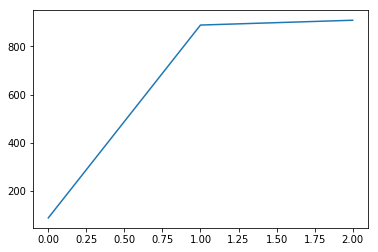

In [4]:
plt.plot([87,889,909])

In [3]:
with open('lfw-grouped.json') as json_file:  
    grouped = json.load(json_file)

In [4]:
classes = list(grouped.keys())

In [5]:
state = torch.load('log/best_state.pth', map_location='cpu')
state['accuracy'], state['epoch']

(0.9189, 145)

In [6]:
trfrm =transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
topil = transforms.ToPILImage()
totensor = transforms.ToTensor()

In [7]:
def get_same_notsame(size, grouped, classes):
    notsame = []
    same = []
    while len(same) < size:
        class_ = choice(classes)
        if len(grouped[class_]) < 2:
            continue
        same.append(tuple(sample(grouped[class_], 2)))
    while len(notsame) < size:
        class1 = choice(classes)
        class2 = choice(classes)
        if class1 == class2:
            continue
        notsame.append(tuple([choice(grouped[class1]), choice(grouped[class2])]))
    return {'same': same, 'notsame': notsame}
    
def imshow(img,text=None,should_save=False):
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(img.permute(1,2,0))

def get_distance(timg1, timg2):
    model.eval()
    with torch.no_grad():
        embed1 = model(timg1.unsqueeze(0))
        embed2 = model(timg2.unsqueeze(0))
    return F.pairwise_distance(embed1, embed2).item()

In [8]:
data = get_same_notsame(50, grouped, classes)

In [ ]:
model = FaceNetModel(128, 500, True)
model.load_state_dict(state['state_dict'])

In [1]:
path = choice(data['same'])
path1 = path[0]
path2 = path[1]
img0 = Image.open(path1)
img1 = Image.open(path2)
img0
# x0 = totensor(img0)
# x1 = totensor(img1)
# concatenated = torch.cat((x0,x1),0)
# imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}'.format(5))

NameError: name 'choice' is not defined

In [ ]:
img1

In [ ]:
results = []
for path in data['same']:
    path1 = path[0]
    path2 = path[1]
    img0 = Image.open(path1)
    img1 = Image.open(path2)
    x0 = trfrm(img0)
    x1 = trfrm(img1)
    distance = get_distance(x0, x1)
    results.append((path2.split('/')[-1], path1.split('/')[-1], distance))
    print(path1.split('/')[-1], '\t', path2.split('/')[-1], '\t', distance)
sortedresults = sorted(results, key=lambda k: k[-1], reverse=True)
print()
print('top 5 largest same')
for it in sortedresults[:5]:
    print(it)

In [29]:
results = []
for path in data['notsame']:
    path1 = path[0]
    path2 = path[1]
    img0 = Image.open(path1)
    img1 = Image.open(path2)
    x0 = trfrm(img0)
    x1 = trfrm(img1)
    concatenated = torch.cat((totensor(img0),totensor(img1)),0)
    concatenated.shape
    distance = get_distance(x0, x1)
    results.append((path2.split('/')[-1], path1.split('/')[-1], distance))
    print(path1.split('/')[-1], '\t', path2.split('/')[-1], '\t', distance)
sortedresults = sorted(results, key=lambda k: k[-1])
print()
print('top 5 lowest notsame')
for it in sortedresults[:5]:
    print(it)

Naji_Sabri_0005.jpg 	 Leuris_Pupo_0001.jpg 	 2.829508066177368
Linda_Baboolal_0001.jpg 	 Danny_Green_0001.jpg 	 3.1970763206481934
Debra_Shank_0001.jpg 	 Leuris_Pupo_0001.jpg 	 3.60748553276062
Carlos_De_Abreu_0001.jpg 	 Morgan_Hentzen_0001.jpg 	 3.2909352779388428
Mira_Sorvino_0001.jpg 	 Joan_Dangerfield_0001.jpg 	 1.783943772315979
Robert_Vowler_0001.jpg 	 Faisal_Iqbal_0001.jpg 	 2.209958791732788
Patricia_Russo_0001.jpg 	 Meghann_Shaughnessy_0002.jpg 	 2.8840348720550537
Dick_Devine_0001.jpg 	 Stella_Tennant_0001.jpg 	 3.415562152862549
Lucrecia_Orozco_0001.jpg 	 Dustin_Brown_0001.jpg 	 2.355517625808716
Andy_Bryant_0001.jpg 	 Kristen_Breitweiser_0003.jpg 	 3.494917154312134
Ramon_Ponce_de_Leon_0001.jpg 	 Lynn_Abraham_0001.jpg 	 3.5241920948028564
Hermando_Harton_0001.jpg 	 Boris_Henry_0001.jpg 	 3.4171695709228516
Thomas_Ulrich_0001.jpg 	 Pat_Cox_0002.jpg 	 2.6086974143981934
King_Abdullah_II_0001.jpg 	 Mark_Podlesny_0001.jpg 	 3.0868496894836426
David_Millar_0001.jpg 	 Ziwang_Xu_0